# CRIS — Exploratory Data Analysis (Repaired)

This is a repaired version of the EDA notebook that gracefully handles missing tables in the local SQLite database.

In [1]:

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Force SQLite for local EDA
os.environ['CRIS_DB_TYPE'] = 'sqlite'
sys.path.insert(0, '..')

from src.db_connector import run_query

# Style
sns.set_theme(style='whitegrid', palette='viridis')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print('Libraries loaded.')


Libraries loaded.


In [2]:

# Load tables safely
try:
    customers = run_query('SELECT * FROM customers')
except Exception:
    customers = pd.DataFrame()
    print("Could not load customers")

try:
    orders = run_query('SELECT * FROM orders')
except Exception:
    orders = pd.DataFrame()
    print("Could not load orders (missing in local DB)")

try:
    items = run_query('SELECT * FROM order_items')
except Exception:
    items = pd.DataFrame()
    print("Could not load items (missing in local DB)")

try:
    labels = run_query('SELECT * FROM customer_labels')
except Exception:
    labels = pd.DataFrame()
    print("Could not load labels (missing in local DB)")
    
try:
    features = run_query('SELECT * FROM customer_features')
except Exception:
    features = pd.DataFrame()
    print("Could not load features")

print(f'Customers: {len(customers)} rows')
print(f'Orders:    {len(orders)} rows')
print(f'Items:     {len(items)} rows')


Customers: 200 rows
Orders:    989 rows
Items:     3005 rows


## 1. Demographics Analysis

C:\Users\dkhar\AppData\Local\Temp\ipykernel_27636\1050632016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


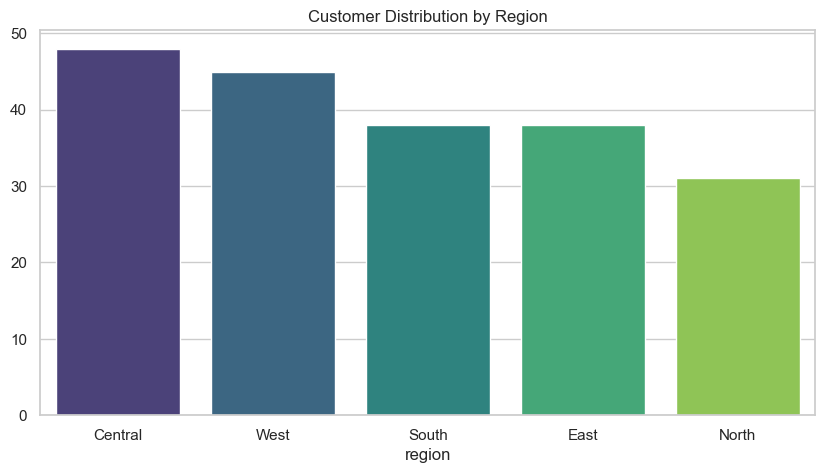

In [3]:

if not customers.empty and 'region' in customers.columns:
    region_counts = customers['region'].value_counts()
    plt.figure(figsize=(10,5))
    sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
    plt.title('Customer Distribution by Region')
    plt.show()
else:
    print("Skipping regional analysis due to missing data.")


## 2. Feature Analysis

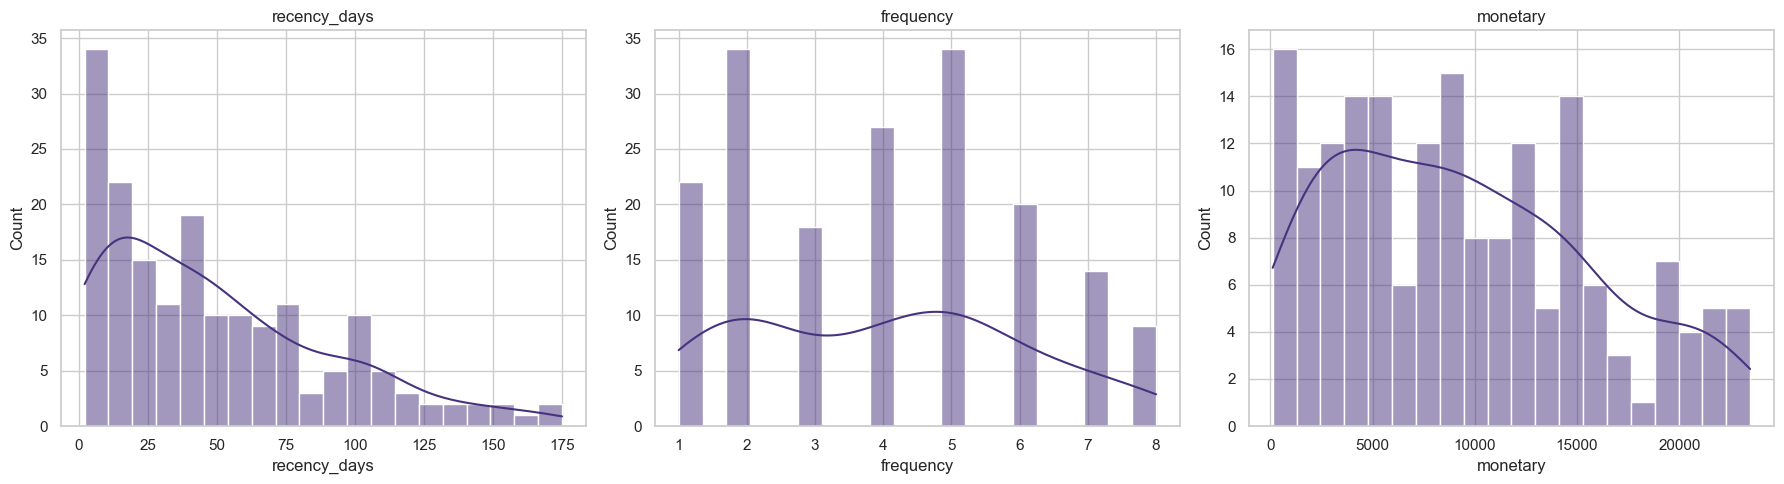

In [4]:

if not features.empty:
    cols_to_plot = ['recency_days', 'frequency', 'monetary']
    valid_cols = [c for c in cols_to_plot if c in features.columns]
    
    if valid_cols:
        fig, axes = plt.subplots(1, len(valid_cols), figsize=(6*len(valid_cols), 5))
        if len(valid_cols) == 1: axes = [axes]
        
        for i, col in enumerate(valid_cols):
            sns.histplot(data=features, x=col, bins=20, kde=True, ax=axes[i])
            axes[i].set_title(col)
        plt.tight_layout()
        plt.show()
else:
    print("Skipping feature analysis.")
